# Redes Sociales

Una red social es un grafo cuyos vértices representan personas, páginas web u organizaciones y las aristas algún tipo de interacción social. La centralidad de un vértices en una red social está relacionado a la importancia del vértice en el grafo. El grado de un vértice corresponde a la cantidad de aristas incidentes.


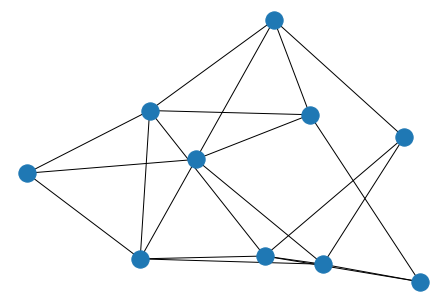

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
rng=numpy.random.seed(4812)

G=nx.erdos_renyi_graph(10,0.5,directed=False,seed=rng)
d=nx.degree(G)
cd=nx.degree_centrality(G)
nx.draw(G)
plt.show()

In [5]:
sort_nodes = sorted(cd.items(), key=lambda x: x[1], reverse=True)

In [6]:
for i in sort_nodes:
	print('nodo : {0}, centralidad grado : {1:0.2f}'.format(i[0], i[1]))

nodo : 0, centralidad grado : 0.56
nodo : 1, centralidad grado : 0.56
nodo : 5, centralidad grado : 0.56
nodo : 8, centralidad grado : 0.56
nodo : 9, centralidad grado : 0.56
nodo : 2, centralidad grado : 0.44
nodo : 3, centralidad grado : 0.44
nodo : 4, centralidad grado : 0.33
nodo : 6, centralidad grado : 0.33
nodo : 7, centralidad grado : 0.33


In [7]:
A=nx.adjacency_matrix(G).todense()

In [8]:
import numpy as np
from numpy.linalg import eig
import scipy as sp

values,vectors=eig(A.T)

In [9]:
print('Valores propios de A.T')
print(['%s %0.2f'%(node,values[node]) for node in range(len(values))])

Valores propios de A.T
['0 4.36', '1 -2.79', '2 1.79', '3 1.34', '4 -0.82', '5 -1.88', '6 -1.62', '7 0.62', '8 0.62', '9 -1.62']


In [10]:
print('Primer vector propio')

for i in enumerate(vectors[:,0]):
  print('nodo : {0}, centralidad vector propio : {1:0.2f}'.format(i[0], np.abs(float(i[1]))))

Primer vector propio
nodo : 0, centralidad vector propio : 0.36
nodo : 1, centralidad vector propio : 0.36
nodo : 2, centralidad vector propio : 0.28
nodo : 3, centralidad vector propio : 0.28
nodo : 4, centralidad vector propio : 0.23
nodo : 5, centralidad vector propio : 0.39
nodo : 6, centralidad vector propio : 0.23
nodo : 7, centralidad vector propio : 0.25
nodo : 8, centralidad vector propio : 0.36
nodo : 9, centralidad vector propio : 0.36


In [11]:
ce=nx.eigenvector_centrality_numpy(G)
sort_nodes = sorted(ce.items(), key=lambda x: x[1], reverse=True)

In [12]:
print('centralidad valores propios: ')
for i in sort_nodes:
	print('nodo : {0}, centralidad vector propio : {1:0.2f}'.format(i[0], i[1]))

centralidad valores propios: 
nodo : 5, centralidad vector propio : 0.39
nodo : 9, centralidad vector propio : 0.36
nodo : 0, centralidad vector propio : 0.36
nodo : 8, centralidad vector propio : 0.36
nodo : 1, centralidad vector propio : 0.36
nodo : 3, centralidad vector propio : 0.28
nodo : 2, centralidad vector propio : 0.28
nodo : 7, centralidad vector propio : 0.25
nodo : 4, centralidad vector propio : 0.23
nodo : 6, centralidad vector propio : 0.23


In [13]:
cb=nx.betweenness_centrality(G)
sort_nodes = sorted(cb.items(), key=lambda x: x[1], reverse=True)

print('centralidad cercania: ')
for i in sort_nodes:
	print('nodo : {0}, centralidad cercania : {1:0.2f}'.format(i[0], i[1]))


centralidad cercania: 
nodo : 9, centralidad cercania : 0.12
nodo : 0, centralidad cercania : 0.12
nodo : 1, centralidad cercania : 0.10
nodo : 8, centralidad cercania : 0.10
nodo : 5, centralidad cercania : 0.08
nodo : 2, centralidad cercania : 0.07
nodo : 3, centralidad cercania : 0.07
nodo : 4, centralidad cercania : 0.03
nodo : 6, centralidad cercania : 0.03
nodo : 7, centralidad cercania : 0.01


In [14]:
cc=nx.load_centrality(G)
sort_nodes = sorted(cc.items(), key=lambda x: x[1], reverse=True)
print('centralidad intermediacion: ')
for i in sort_nodes:
	print('nodo : {0}, centralidad intermediacion : {1:0.2f}'.format(i[0], i[1]))

centralidad intermediacion: 
nodo : 0, centralidad intermediacion : 0.12
nodo : 9, centralidad intermediacion : 0.12
nodo : 1, centralidad intermediacion : 0.10
nodo : 8, centralidad intermediacion : 0.10
nodo : 5, centralidad intermediacion : 0.08
nodo : 2, centralidad intermediacion : 0.07
nodo : 3, centralidad intermediacion : 0.07
nodo : 4, centralidad intermediacion : 0.03
nodo : 6, centralidad intermediacion : 0.03
nodo : 7, centralidad intermediacion : 0.01


# Redes Libres de Escala


1. Las redes libres de escala (scale-free) son redes cuya distribución de grados obedece una ley de potencia
2. Esto significa que unos pocos nodos se encuentran bien conectados y la mayoría se encuentran pobremente conectados.
3. Este tipo de redes se encuentran naturalmente en redes biológicas, citas bibliográficas y la Internet.

In [15]:
! wget https://raw.githubusercontent.com/sherna90/matematicas_discretas/master/data/facebook_combined.txt

--2021-06-07 13:09:43--  https://raw.githubusercontent.com/sherna90/matematicas_discretas/master/data/facebook_combined.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 854362 (834K) [text/plain]
Saving to: ‘facebook_combined.txt’

facebook_combined.t 100%[===================>] 834.34K  --.-KB/s    in 0.04s   

2021-06-07 13:09:43 (21.6 MB/s) - ‘facebook_combined.txt’ saved [854362/854362]



In [16]:
import networkx as nx
import matplotlib.pyplot  as plt 

G_fb=nx.read_edgelist('facebook_combined.txt',create_using=nx.Graph(),nodetype=int)
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


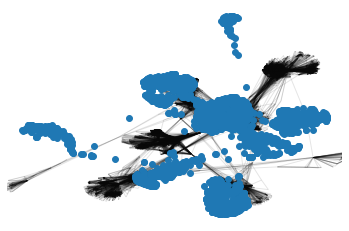

In [17]:
plt.axis("off")
nx.draw_networkx_nodes(G_fb,pos=nx.spring_layout(G_fb),node_size=35)
nx.draw_networkx_edges(G_fb,pos=nx.spring_layout(G_fb),alpha=0.1)
plt.show()

In [18]:
cd_fb=nx.degree_centrality(G_fb)
cb_fb=nx.betweenness_centrality(G_fb)

In [19]:
import pandas as pd

def get_node(centrality,func):
    lookup_list = pd.Series(centrality)
    min_val= func(centrality.values())
    return lookup_list[lookup_list.values == min_val]

print(get_node(cd_fb,max))
print(get_node(cb_fb,max))

107    0.258791
dtype: float64
107    0.480518
dtype: float64


In [21]:
print(nx.degree(G_fb,107))

1045


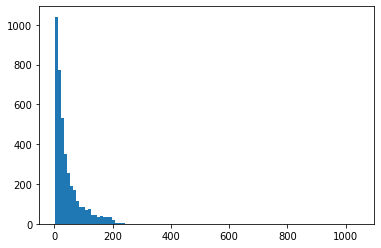

In [22]:
degrees=nx.degree(G_fb)
plt.hist([d for (n,d) in degrees],100)
plt.show()

In [ ]:
pr_fb=nx.pagerank(G_fb,alpha=0.85)



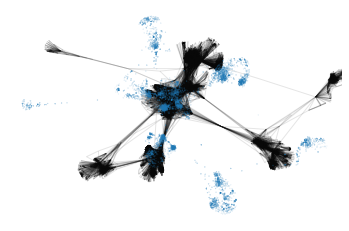

In [35]:
nsize=pr_fb.values()
nsize=[ (val-min(nsize))/(max(nsize)-min(nsize)) for val in nsize]
plt.axis("off")
nx.draw_networkx_nodes(G_fb,pos=nx.spring_layout(G_fb),node_size=nsize)
nx.draw_networkx_edges(G_fb,pos=nx.spring_layout(G_fb),alpha=0.1)
plt.show()

In [43]:
sort_nodes = sorted(pr_fb.items(), key=lambda x: x[1], reverse=True)
j=0
print('centralidad pagerank: ')
for i in sort_nodes:
  j+=1
  if j==10:
    break
  print('nodo : {0}, centralidad pagerank : {1:0.4f}'.format(i[0], i[1]))

centralidad pagerank: 
nodo : 3437, centralidad pagerank : 0.0076
nodo : 107, centralidad pagerank : 0.0069
nodo : 1684, centralidad pagerank : 0.0064
nodo : 0, centralidad pagerank : 0.0063
nodo : 1912, centralidad pagerank : 0.0039
nodo : 348, centralidad pagerank : 0.0023
nodo : 686, centralidad pagerank : 0.0022
nodo : 3980, centralidad pagerank : 0.0022
nodo : 414, centralidad pagerank : 0.0018
